# Taller 03 - Clasificación y Técnicas de Aprendizaje de Máquina
- Analítica de Datos
- Autor: David Santiago Barreto Mora
---

## 1. Seleccionar una data del repo de Github.
Los datos seleccionados para el taller son los que se encuentran en 'creditcard.csv'


In [1]:
data_url = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/datos_credit_card.csv"

Iniciamos con importar todas las librerias usadas comúnmente.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 4. Objeto de clasificación y documentación

In [3]:
creditcard_df = pd.read_csv(data_url)

creditcard_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


El dataset escogido contiene información sobre impagos (defaults), factores demográficos, datos crediticios, historial de pagos y extractos de facturas de clientes de tarjetas de crédito en Taiwán desde abril de 2005 hasta septiembre de 2005. En total hay 24 columnas, cada una representando la siguiente información:

- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

Esta información fue sacada de Kaggle, donde se puede encontrar el mismo dataset: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


### Objetivo de clasificación
Sabiendo que el dataset contiene una etiqueta binaria para cada uno de los registros ('default payment next month'), el objetivo de clasificación es **intentar saber si el cliente hizo default el siguiente més, a partir de los otros atributos presentes.** La étiqueta solo puede tomar 2 valores, 0 o 1, por lo que estamos trabajando con un problema de clasificación binaria.

Para la clasificación se usaran los modelos de 1. Regresión Logística y 2. Random Forest.

## 5. Documentación del proceso de exploración y limpieza de datos.

### Exploración de datos
Iniciamos con descubrir las características más esenciales del dataset, como por ejemplo, tamaño del dataframe, nombres y tipos de columnas, registros vacios y distribución entre las personas que hicieron default (1) y las que no (0).

In [4]:
# Tamaño del dataset
creditcard_df.shape

(30000, 24)

Estamos tratando con un dataset de 30,000 registros y 24 columnas, como fue mencionado más arriba. 

In [6]:
# Tipos de datos y nombres de las columnas
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

Respecto a las columnas, podemos ver que todas ya son de tipo entero, lo cual nos evita tener que transformar tipos de columnas en una parte posterior.
Algo que también resalta es el hecho de que ninguna columna tiene un dato vacio o faltante. Esto es *excelente!* ya que tampoco hay que eliminar datos nulos.

In [7]:
# Numero de registros vacios por columna
creditcard_df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Arriba podemos confirmar que no hay ninguna columna que tenga un registro vacio. Esto es indicativo de que el dataset muy probablemente ya fue tratado anterior a su publicación. También indica que la calidad de los datos es alta.

0    23364
1     6636
Name: default payment next month, dtype: int64


<Axes: xlabel='default payment next month', ylabel='count'>

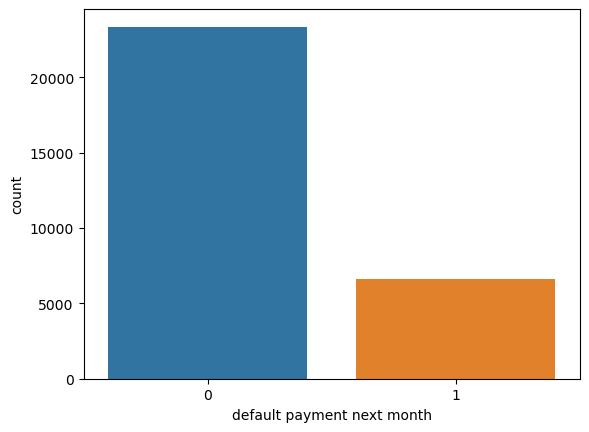

In [8]:
# Distribucion mumerica de las variable objetivo 'default payment next month'
print(creditcard_df['default payment next month'].value_counts())

# Grafica de barras de distribucion de la variable objetivo 'default payment next month'
sns.countplot(x='default payment next month', data=creditcard_df)


Podemos ver que hay un desbalance claro entre las dos clases a evaluar. Hay muchos más datos para 0 (se paga a tiempo el siguiente mes). Casi que 4 veces más la cantidad de datos que tienen como resultado 1 (default).



Ahora hacemos una matriz de correlación para ver posible relaciones entre variables. Usamos la matriz de correlación estándar, ya que todos los datos son númericos.

Haciendo transición hacia el proceso de limpieza de datos, ahora buscamos datos duplicados, outliers o datos atípicos.

In [9]:
# Busqueda de datos duplicados
creditcard_df.duplicated().sum()

35

In [10]:
# Busqueda de outliers o valores atipicos
creditcard_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Una revisión visual de esta tabla pareciera indicar que no hay outliers muy evidentes. Por ejemplo no hay valores negativos donde no deberían haber (edad, sexo, default) y tampoco pareciera haber valores muy extremos. 

Para verificar esto, hacemos box plots para las primeras 5 columnas.

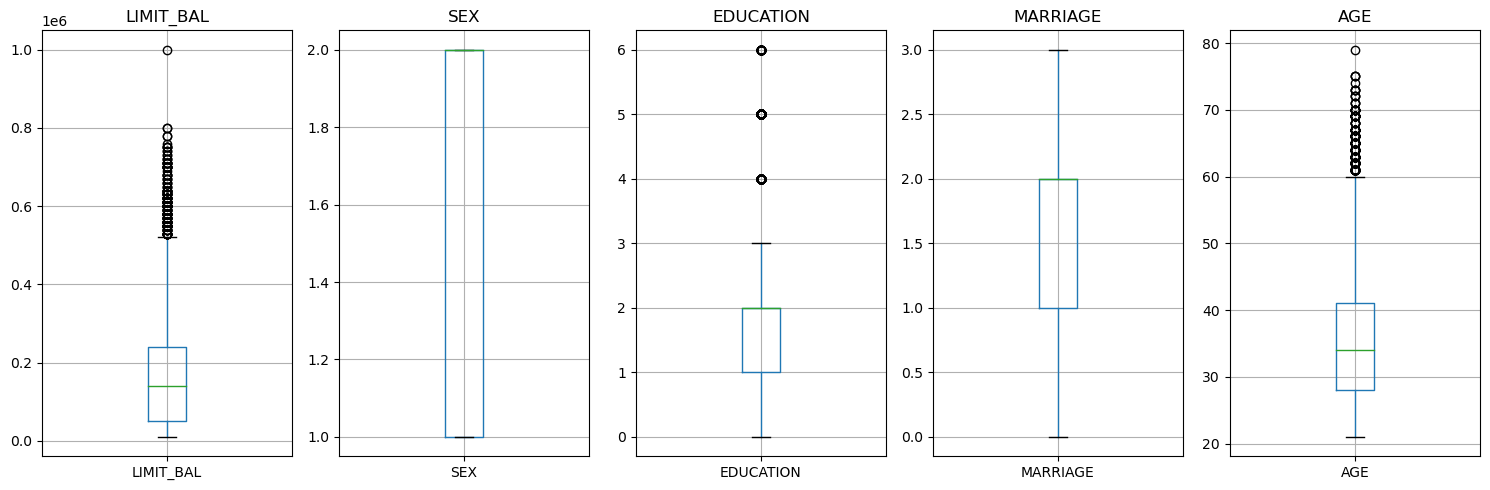

In [41]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

# Create box plots for the first 5 columns
for i, column in enumerate(creditcard_df.columns[:5]):
    creditcard_df.boxplot(column, ax=axes[i])
    axes[i].set_title(column)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


La gráfica nos permite confirmar que no hay outliers relevantes en las primeras 5 columnas del dataset. De nuevo, indicativo de la calidad de los datos y un muy probable procesamiento de datos hecho anteriormente.

### Limpieza de datos
Como acabamos de ver, los datos tienen ya una alta calidad y hay poco por hacer. Solo quitaremos los datos duplicados y renombraremos la columna objetivo.

In [11]:
# Removemos los datos duplicados
creditcard_df.drop_duplicates(inplace=True)

creditcard_df.shape

(29965, 24)

In [12]:
# Renombramos la columna 'default payment next month' a 'default'
creditcard_df.rename(columns={'default payment next month': 'default'}, inplace=True)
creditcard_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Axes: >

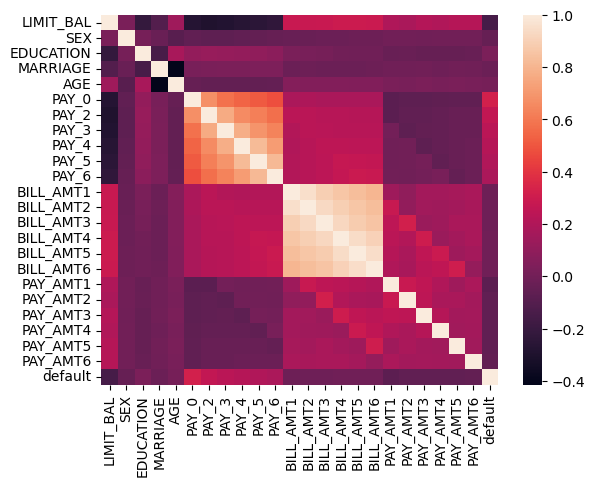

In [13]:
# Matriz de correlacion
corrMat = creditcard_df.corr()
sns.heatmap(corrMat, )


## 6. Anunciar y describir al menos 2 técnicas de ML a usar.
Las técnicas de clasificación a usar son Random Forest y el Regresor Logistico. Se usan estas técnicas por su simplicidad y efectividad. También porque en un dataset 

**Random Forest**

Random Forest combina la salida de múltiples árboles de decisión para alcanzar un solo resultado. Los árboles de decisión son modelos de aprendizaje supervisado que clasifican o predicen valores de salida en función de un conjunto de variables de entrada.

El Random Forest funciona creando un conjunto de árboles de decisión, cada uno de los cuales se construye a partir de un subconjunto aleatorio de los datos de entrenamiento. Para construir cada árbol, se seleccionan aleatoriamente un conjunto de variables de entrada para cada nodo de decisión. Esto ayuda a evitar el sobreajuste, que es un problema que puede ocurrir cuando un modelo se adapta demasiado a los datos de entrenamiento.


**Regresor logístico**

El Regresor logístico es un modelo de tipo regresión que se utiliza para predecir la probabilidad de que un punto de datos pertenezca a una clase determinada. El Regresor logístico se basa en la función logística, que es una función S-shaped que se puede utilizar para modelar la relación entre las variables de entrada y la variable de salida.

El Regresor logístico se puede utilizar para problemas de clasificación binaria, en los que la variable de salida tiene dos clases posibles. En el caso de la clasificación binaria, el Regresor logístico predice la probabilidad de que un punto de datos pertenezca a la clase positiva.

**Ventajas y desventajas**

Random Forest

Ventajas:
- Robusto al sobreajuste
- Se puede utilizar para problemas de clasificación y regresión
- Fácil de implementar y usar
Desventajas:
- Puede ser lento para entrenar
- Puede ser difícil interpretar los resultados

Regresor logístico

Ventajas:
- Es un modelo bien entendido
- Se puede utilizar para problemas de clasificación binaria
- Fácil de implementar y usar
Desventajas:
- Puede ser sensible al ruido en los datos
- Puede ser difícil interpretar los resultados

## 7. Implementación de las dos técnicas
Antes que nada, importamos las librerias necesarias para usar los modelos.

In [14]:
# Importamos las librerias necesarias para implementar el random forest y el modelo de regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Ahora dividimos el dataset en el split de 80-20 estándar para datos de entrenamiento y prueba.

In [15]:
# Particionamos el dataset con el split 80/20
X_train, X_test, y_train, y_test = train_test_split(creditcard_df.drop('default', axis=1), creditcard_df['default'], test_size=0.2, random_state=24)

### 7.1 Random Forest 
Creamos y entrenamos el clasificador Random Forest.

In [16]:
# Creamos el clasificador random forest
rfc = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=24) 
# n_estimators es el numero de arboles, max_depth es la profundidad maxima de cada arbol 
# y random_state es la semilla para la generacion de numeros aleatorios.

# Entrenamos el clasificador
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=10, random_state=24)

### 7.2 Regresor logístico
Posteriormente creamos y entrenamos el regresor logístico.

In [32]:
# Creamos el clasificador de regresion logistica
logreg = LogisticRegression(random_state=24, class_weight='balanced', max_iter=1000) 
# random_state es la semilla para la generacion de numeros aleatorios, max_iter es el numero maximo de iteraciones para la convergencia.


# Entrenamos el clasificador
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=24)

## 8. Seleccionar métricas apropiadas para evaluar el rendimiento de las técnicas ML implementadas.
Ambos modelos seran evaluados con las siguientes métricas:
- **Métricas de desempeño (accuracy, recall, f1-score, precision):** Métricas de evaluación estándares para cualquier módelo de machine learning.
- **Matriz de confusión:** Tabla que se utiliza para visualizar el rendimiento de un modelo de clasificación. En este caso, la matriz de confusión tiene dos filas y dos columnas, ya que estamos trabajando con una problema de clasificación binaria. Las filas de la matriz de confusión representan las predicciones del modelo. Las columnas de la matriz de confusión representan las clases reales; los valores de la matriz de confusión son el número de puntos de datos que se clasificaron correctamente o incorrectamente en cada clase.
- **Curva ROC:**  representación gráfica de la capacidad de un modelo para distinguir entre dos clases. La curva ROC se construye trazando la tasa de verdaderos positivos (TPR) en el eje Y contra la tasa de falsos positivos (FPR) en el eje X. Una curva ROC que se encuentra en la esquina superior izquierda de la gráfica indica un modelo con un buen rendimiento. Una curva ROC que se encuentra en la diagonal de la gráfica indica un modelo con un rendimiento aleatorio.

Se utilizan las mismas métricas de evaluación para los modelos debido a que son estándares comúnes y recomendados para la evaluación de módelos de clasificación. 

Precisamente, la curva ROC y la matriz de confusión son buenas opciones para evaluar el Random Forest y el Regresor logístico porque son modelos de clasificación. La curva ROC es una buena opción para evaluar el rendimiento general de los modelos, mientras que la matriz de confusión es una buena opción para evaluar el rendimiento de los modelos en cada clase.

Por ejemplo, en nuestro caso específico, la curva ROC nos indicará si el modelo es capaz de distinguir entre clientes que hicieron default o no. La matriz de confusión nos indicará si el modelo está sobreclasificando o infraclasificando a los clientes de cada clase.



Ahora importamos las librerias necesarias para la evaluación de los módelos.

In [42]:
# Importamos las librerias necesarias para evaluar los modelos (Curva ROC, matriz de confusion, precision, recall, f1-score, etc.)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


### 8.2 Predicciones y resultados del Random Forest


In [19]:
# Hacemos las predicciones con el random forest
y_pred_rfc = rfc.predict(X_test)

# Evaluamos las predicciones hechas.
print(classification_report(y_test, y_pred_rfc))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4693
           1       0.68      0.29      0.40      1300

    accuracy                           0.82      5993
   macro avg       0.76      0.62      0.65      5993
weighted avg       0.80      0.82      0.79      5993



Los resultados obtenidos son para un random forest con hiperparámetris (n_estimators=10, max_depth=3, random_state=24). Con el propósito de ver si el desempeño mejora al aumentar los hiperparámetros, creamos otro random forest classifier con un mayor número de árboles y mayor profundidad permitiada para cada árbol. En esencia, queremos ver si estos incrementos mejoran las métricas de predicción. Claramente, al aumentar estos hiperparámetros también suben los requerimientos computacionales.

In [22]:
# Creamos el clasificador random forest
rfc2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42) 
# n_estimators es el numero de arboles, max_depth es la profundidad maxima de cada arbol 
# y random_state es la semilla para la generacion de numeros aleatorios.

# Entrenamos el clasificador
rfc2.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [44]:
# Hacemos las predicciones con el random forest
y_pred_rfc2 = rfc2.predict(X_test)

# Evaluamos las predicciones hechas.
class_report_rfc2 = classification_report(y_test, y_pred_rfc2)
print(class_report_rfc2)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4693
           1       0.68      0.30      0.42      1300

    accuracy                           0.82      5993
   macro avg       0.76      0.63      0.66      5993
weighted avg       0.80      0.82      0.79      5993



Interesantemente, los resultados solo son marginalmente mejores. En muchas categorías los valores son iguales, o mejores por una decima en muchos caso. Esta no es una mejora significativa. Sin embargo, dato que al final de todo los resultados son objetivamente mejores, haremos la matriz de confusión y la curva ROC con este segundo clasificador random forest.

<Axes: >

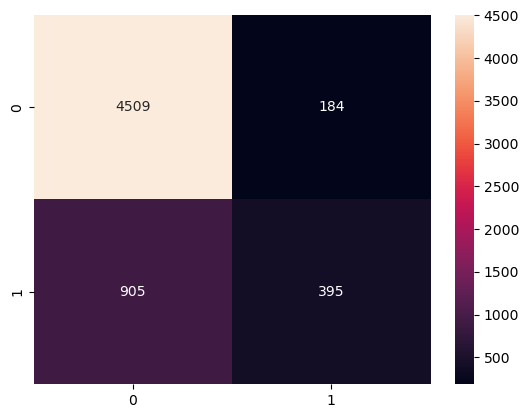

In [53]:
# Creamos la matriz de confusión
cm_rfc2 = confusion_matrix(y_test, y_pred_rfc2)

# Mostramos graficamente la matriz
sns.heatmap(cm_rfc2, annot=True, fmt='d')



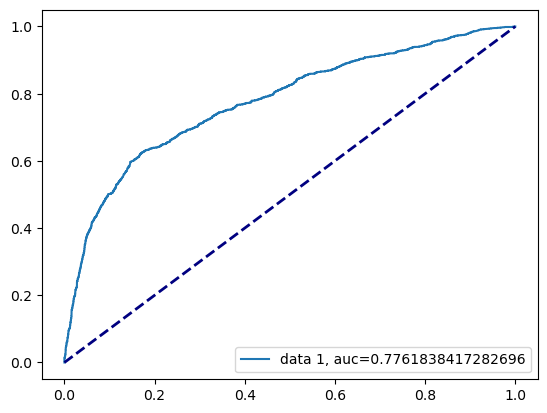

In [51]:
# Creamos la curva ROC, y también mostramos la linea diagonal (auc=0.5)
y_pred_proba_rfc2 = rfc2.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_rfc2)
auc_rfc2 = roc_auc_score(y_test, y_pred_proba_rfc2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc_rfc2))
plt.legend(loc=4)

#Creamos una linea diagonal
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()


### 8.3 Predicciones y resultados del regresor Logístico


In [45]:
# Hacemos las predicciones con el modelo de regresion logistica
y_pred_logreg = logreg.predict(X_test)

# Evaluamos las predicciones hechas.
class_report_reglog = classification_report(y_test, y_pred_logreg)
print(class_report_reglog)

              precision    recall  f1-score   support

           0       0.86      0.50      0.63      4693
           1       0.28      0.72      0.41      1300

    accuracy                           0.54      5993
   macro avg       0.57      0.61      0.52      5993
weighted avg       0.74      0.54      0.58      5993



<Axes: >

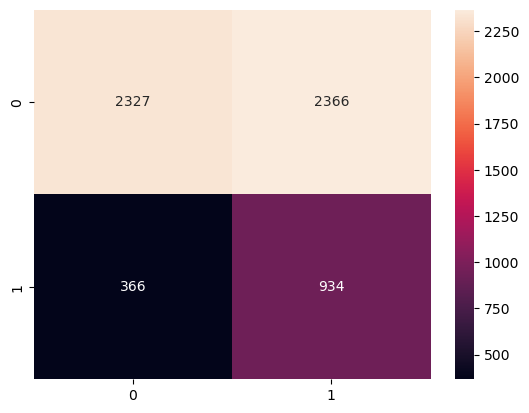

In [54]:
# Matriz de confusion para el modelo de regresion logistica
cm_reglog = confusion_matrix(y_test, y_pred_logreg)

# Mostramos la matriz
sns.heatmap(cm_reglog, annot=True, fmt='d')

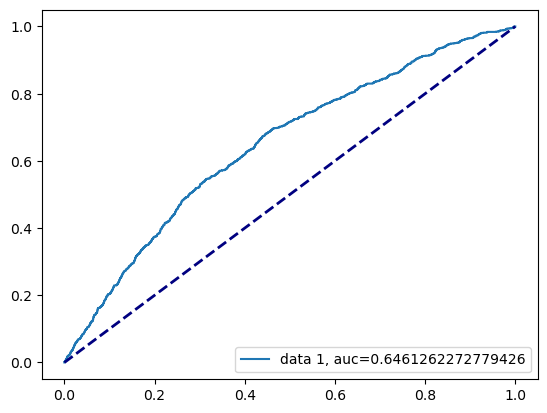

In [50]:
# Creamos la curva ROC, y también mostramos la linea diagonal (auc=0.5)
y_pred_proba_logreg = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_logreg)
auc_reglog = roc_auc_score(y_test, y_pred_proba_logreg)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc_reglog))
plt.legend(loc=4)

#Creamos una linea diagonal
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()


## 9. Presentar una tabla comparativa de rendimiento entre las dos técnicas

In [55]:
# Creamos un dataframe con los resultados de las metricas de evaluacion para los dos modelos
results = pd.DataFrame({
    'Metric': ['ClassificationReport', 'ConfusionMatrix', 'ROC_AUC'],
    'Model 1': [class_report_rfc2, cm_rfc2, auc_rfc2],
    'Model 2': [class_report_reglog, cm_reglog, auc_reglog]
})

# Mostramos la tabla comparativa
pd.set_option('display.max_colwidth', -1)  
display(results)

/var/folders/3f/751qmm693js8prddx3xpgwk80000gn/T/ipykernel_1237/2019425399.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # Display full text in cells


,Metric,Model 1,Model 2
0,ClassificationReport,precision recall f1-score support\n\n 0 0.83 0.96 0.89 4693\n 1 0.68 0.30 0.42 1300\n\n accuracy 0.82 5993\n macro avg 0.76 0.63 0.66 5993\nweighted avg 0.80 0.82 0.79 5993\n,precision recall f1-score support\n\n 0 0.86 0.50 0.63 4693\n 1 0.28 0.72 0.41 1300\n\n accuracy 0.54 5993\n macro avg 0.57 0.61 0.52 5993\nweighted avg 0.74 0.54 0.58 5993\n
1,ConfusionMatrix,"[[4509, 184], [905, 395]]","[[2327, 2366], [366, 934]]"
2,ROC_AUC,0.776184,0.646126


## 10. Hacer las conclusiones.

Respecto a los dos modelos ,podemos observar que el clasificador de random forest (rfc) tiene un mejor desempeño sobre el regresor logístico. La curva ROC nos permite ver que el rfc tiene una capacidad mucho mayor para poder distinguir entre las dos clases, evidenciando también la matríz de confusión. Dentro de la matriz también podemos ver que el clasificador tiene un buen desempeño para los casos donde NO hubo default (0), lo cual también es atribuido al hecho de que la mayoría de las predicciones hechas pertenecian a este clase. Indicativo también de la dificultad que hay para distinguir los datos pertenecientes a la clase 'default' (1).

Probablemente se deba al evidente desbalance que hay entre las dos clases, donde la clase de no-default predomina al tener casi que 4 veces los valores de su contraparte. Esto también afecto claramente el desempeño del regresor logístico, el cual tuvo que ser ajustado con el hiperparámetro 'class_weight' para que por lo menos hiciera predicciones para la clase de default. Es decir, sin este parámetro, el regresor simplemente *no predecia* ningun dato como perteneciente a la clase mencionada anteriormente.

Con respecto también al regresor logístico, podemos ver que en realidad no sabe distinguir entre las 2 clases. La curva ROC es inferior a la del RFC, y también en la matríz de confusión se puede observar que hay una distribución casi que uniforme entre las predecciones, indicando que el modelo no es muy "inteligente" que digamos. Simplemente esta esparciendo sus predicciones.

Todo lo anterior nos permite concluir algunas cosas:
1. El RFC es el mejor módelo de los dos. Tuvo mejores métricas en todas las evaluadas, pero a pesar de esto, sigue teniendo mucha dificultad para clasificar correctamente datos de la clase default.
2. El regresor logístico no es el indicado para este problema. Se podría atribuir al número de features del dataset o también el desbalance de datos, pero el regresor logístico tuvo un mal desempeño en general.
3. El desbalance de las 2 clases tuvo una claraa afectación en el desempeño de los modelos. 
4. El dataset, sin embargo, era de muy alta calidad.